<a href="https://colab.research.google.com/github/Asiriyaku/Web-scrapping/blob/main/Estadisticas_Futbol_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estadísticas de Fútbol - LaLiga EA Sports 2024/2025
### María del Carmen Falcón Aybar
### Maestría en Ciencia de Datos - Captura de la Información

# a. Instaladores

In [ ]:
#Instalando bibliotecas para scrapear
!pip install requests beautifulsoup4

# Instalo bibliotecas para análisis de datos
!pip install pandas numpy matplotlib seaborn openpyxl xlrd

# b. Scrapeo

In [ ]:
import requests
url = requests.get("https://resultados.as.com/resultados/futbol/primera/clasificacion/")

from bs4 import BeautifulSoup
soup = BeautifulSoup(url.text)


# Equipos y puntaje
equipos = []
puntos = []
pcasa = []
pfuera = []

# Encontramos las etiquetas de equipos y puntos
eq = soup.find_all('span', class_='nombre-equipo')
pts = soup.find_all('td', class_='destacado')

# Dividimos `pts` en las diferentes listas según su posición
pts_total = pts[:20]
pts_casa = pts[20:40]
pts_fuera = pts[40:60]

# Iteramos sobre ambas listas en un solo bucle, limitando a 20 elementos
for equipo, punto, casa, fuera in zip(eq[:20], pts_total, pts_casa, pts_fuera):
    equipos.append(equipo.get_text(strip=True))
    puntos.append(punto.get_text(strip=True))
    pcasa.append(casa.get_text(strip=True))
    pfuera.append(fuera.get_text(strip=True))

# Impresión y verificación
print('Longitud equipos:', len(equipos))
print('Longitud puntaje total:', len(puntos))
print('Longitud puntaje casa:', len(pcasa))
print('Longitud puntaje visitante:', len(pfuera))

# Imprimir equipos y puntajes en columnas
print(f'{"Equipo":<20} | Puntaje | PCasa | PFuera')
print('-' * 40)  # Línea de separación

for equipo, punto, casa, fuera in zip(equipos, puntos, pcasa, pfuera):
    print(f'{equipo:<20} | {punto} | {casa} | {fuera}')


Longitud equipos: 20
Longitud puntaje total: 20
Longitud puntaje casa: 20
Longitud puntaje visitante: 20
Equipo               | Puntaje | PCasa | PFuera
----------------------------------------
Barcelona            | 88 | 43 | 45
Real Madrid          | 84 | 49 | 35
Atlético             | 76 | 46 | 30
Athletic             | 70 | 39 | 31
Villarreal           | 70 | 34 | 36
Betis                | 60 | 34 | 26
Celta                | 55 | 36 | 19
Rayo                 | 52 | 26 | 26
Osasuna              | 52 | 36 | 16
Mallorca             | 48 | 27 | 21
R. Sociedad          | 46 | 27 | 19
Valencia             | 46 | 31 | 15
Getafe               | 42 | 19 | 23
Espanyol             | 42 | 30 | 12
Alavés               | 42 | 24 | 18
Girona               | 41 | 24 | 17
Sevilla              | 41 | 24 | 17
Leganés              | 40 | 25 | 15
Las Palmas           | 32 | 17 | 15
Real Valladolid      | 16 | 13 | 3


# Prueba de importanción de datos

In [ ]:
import pandas as pd

# Create a DataFrame
dataframe = pd.DataFrame({
    'Equipo' : equipos,
    'PtsTotal': puntos,
    'PtsCasa': pcasa,
    'PtsFuera': pfuera
})

# Print the DataFrame
print(dataframe)

# Save the DataFrame to a CSV file
dataframe.to_csv('LigaEuropea.csv', index=False)

             Equipo PtsTotal PtsCasa PtsFuera
0         Barcelona       88      43       45
1       Real Madrid       84      49       35
2          Atlético       76      46       30
3          Athletic       70      39       31
4        Villarreal       70      34       36
5             Betis       60      34       26
6             Celta       55      36       19
7              Rayo       52      26       26
8           Osasuna       52      36       16
9          Mallorca       48      27       21
10      R. Sociedad       46      27       19
11         Valencia       46      31       15
12           Getafe       42      19       23
13         Espanyol       42      30       12
14           Alavés       42      24       18
15           Girona       41      24       17
16          Sevilla       41      24       17
17          Leganés       40      25       15
18       Las Palmas       32      17       15
19  Real Valladolid       16      13        3


#### Verificando el llamado de los datos

In [ ]:
# Read the CSV file
LigaEA = pd.read_csv("LigaEuropea.csv")

# View the first 5 rows
LigaEA.head()

,Equipo,PtsTotal,PtsCasa,PtsFuera
0,Barcelona,88,43,45
1,Real Madrid,84,49,35
2,Atlético,76,46,30
3,Athletic,70,39,31
4,Villarreal,70,34,36


# Gráficos básicos

Equipos disponibles:
- Barcelona
- Real Madrid
- Atlético
- Athletic
- Villarreal
- Betis
- Celta
- Rayo
- Osasuna
- Mallorca
- R. Sociedad
- Valencia
- Getafe
- Espanyol
- Alavés
- Girona
- Sevilla
- Leganés
- Las Palmas
- Real Valladolid

Ingrese el nombre del equipo exactamente como aparece arriba: Barcelona

Barcelona jugó un total de 38 partidos.
Puntos totales: 88
Pts en casa: 43 (48.9%)
Pts fuera: 45 (51.1%)


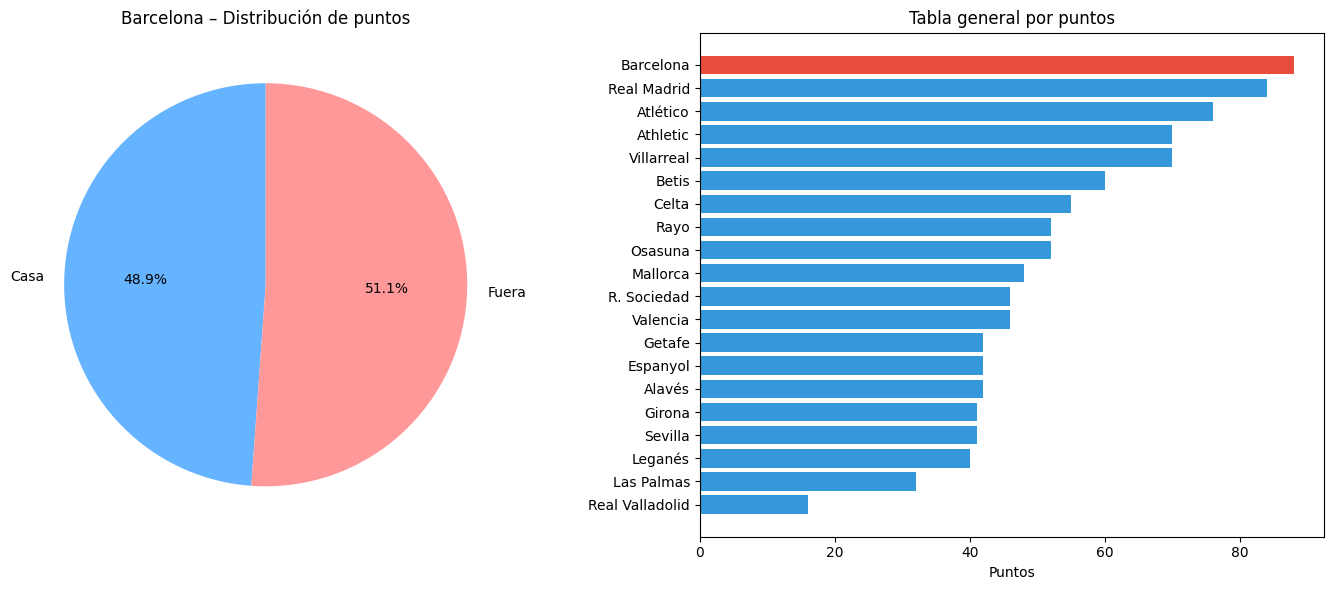

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


LigaEA = pd.read_csv('LigaEuropea.csv')

# Mostrar lista de equipos
print("Equipos disponibles:")
for equipo in LigaEA['Equipo']:
    print("-", equipo)

# Input
equipo_input = input("\nIngrese el nombre del equipo exactamente como aparece arriba: ")

# OJO ==> Verificar siempre si existe el equipo
if equipo_input in LigaEA['Equipo'].values:
    fila = LigaEA[LigaEA['Equipo'] == equipo_input].iloc[0]

    pts_total = fila['PtsTotal']
    pts_casa = fila['PtsCasa']
    pts_fuera = fila['PtsFuera']

    print(f"\n{equipo_input} jugó un total de 38 partidos.")
    print(f"Puntos totales: {pts_total}")
    print(f"Pts en casa: {pts_casa} ({round(pts_casa / pts_total * 100, 1)}%)")
    print(f"Pts fuera: {pts_fuera} ({round(pts_fuera / pts_total * 100, 1)}%)")


    df_ordenado = LigaEA.sort_values(by='PtsTotal', ascending=False)

    # Gráfico combinado
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    # Gráfico de torta
    axs[0].pie([pts_casa, pts_fuera],
               labels=['Casa', 'Fuera'],
               autopct='%1.1f%%',
               colors=['#66b3ff', '#ff9999'],
               startangle=90)
    axs[0].set_title(f"{equipo_input} – Distribución de puntos")

    # Gráfico de barras - Tabla general
    colores = ['#3498db' if eq != equipo_input else '#e74c3c' for eq in df_ordenado['Equipo']]  # Aquí se resalta el equipo seleccionado

    axs[1].barh(df_ordenado['Equipo'], df_ordenado['PtsTotal'], color=colores)
    axs[1].invert_yaxis()  # Invertimos para que el primero quede arriba
    axs[1].set_title("Tabla general por puntos")
    axs[1].set_xlabel("Puntos")

    plt.tight_layout()
    plt.show()

else:
    print("Equipo no encontrado. Verifique que el nombre esté bien escrito.")
